| Name  | Surname   | Student No  | Department  |
|---|---|---|---|
| Emin  | Kartci  | S014877  | EE Engineering  |

## Emin Kartci
#### Student ID: S014877
#### Department  : Electrical & Electronics Engineering
---
### Semester Project - Foursquare & Restaurant Report
---
#### This module is prepared for GUI
---



In [13]:
# To interact with user use ipywidgets library - Generate a simple GUI
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
################################-- Function Description --#################################

# Purpose:
#       This class represents a company. For other modules we will need its values.
#    Moreover, creating a class makes simple our code.

# PROPERTIES:
#   
#   From constructor:
#   name                -> Name of the company                (String)
#   longitude           -> To represent at the map            (String)
#   latitude            -> To represent at the map            (String)
#   servicesList        -> To compare with others             (List)
#   averagePrice        -> For income statement - Simulation  (Float)
#   averageUnitCost     -> For incoma statement - Simulation  (Float)
#   salesVolume         -> For incoma statement - Simulation  (Float)
#   fixedCost           -> For incoma statement - Simulation  (Float)
#   taxRate             -> For incoma statement - Simulation  (Float)
#
#   Calculate:
#
#   contributionMargin  -> For incoma statement - Simulation  (Float)
#   revenue             -> For incoma statement - Simulation  (Float)
#   costOfGoodSold      -> For incoma statement - Simulation  (Float)
#   grossMargin         -> For incoma statement - Simulation  (Float)
#   taxes               -> For incoma statement - Simulation  (Float)
#   netIncome           -> For incoma statement - Simulation  (Float)
#


# BEHAVIOUR:
#   
#   print_company_description -> prints the company inputs to the console
#   print_income_statement    -> prints the income statemnt to the console

#################################-- END Function Description --##############################


# Create a Company class
class Company():
    
    # Constuctor
    def __init__(self, name,longitude,latitude,servicesList,averagePrice,averageUnitCost,salesVolume,fixedCost,taxRate):
        
        
        
        self.name            = name
        self.longitude       = longitude
        self.latitude        = latitude
        self.servicesList    = servicesList
        
        self.averagePrice    = averagePrice
        self.averageUnitCost = averageUnitCost
        self.salesVolume     = salesVolume
        self.fixedCost       = fixedCost
        self.taxRate         = taxRate/100
        
        # calculate remain properties
        self.contributionMargin   = self.calculate_contribution_margin()
        self.revenue              = self.calculate_revenue()
        self.costOfGoodSold       = self.calculate_COGS()
        self.totalCost            = self.calculate_total_cost()
        self.grossMargin          = self.calculate_gross_margin()
        self.taxes                = self.calculate_taxes()
        self.netIncome            = self.calculate_net_income()
        
        
        
    def calculate_contribution_margin(self):
        
        return self.averagePrice - self.averageUnitCost
    
    def calculate_revenue(self):
        
        return self.averagePrice * self.salesVolume
    
    def calculate_COGS(self):
        
        return self.salesVolume * self.averageUnitCost
    
    def calculate_gross_margin(self):
    
        return self.revenue - self.costOfGoodSold
    
    def calculate_taxes(self):
    
        return self.grossMargin * self.taxRate
    
    def calculate_net_income(self):
    
        return self.grossMargin - self.taxes
    
    def calculate_total_cost(self):
    
        return self.costOfGoodSold + self.fixedCost
    
    
    ########################################################################
    
    def print_company_description(self):
        
        companyDescription = """
            
            Company Name: {}
            
            Location:
                - Longitude : {}° N
                - Latitude  : {}° E
                
            Services:
                {}
            Average Price      : {}
            Average Unit Cost  : {}
            
            Sales Volume       : {}
            
            Fixed Cost         : {}
            
            Tax Rate           : {}
            
        
        """.format(self.name,self.longitude,self.latitude,self.set_services_string(),self.averagePrice,self.averageUnitCost,self.salesVolume,self.fixedCost,self.taxRate)
        
        print(companyDescription)
        
    def set_services_string(self):
        
        
        serviesString = ""
        
        for index in range(1,len(self.servicesList)+1):
            
            serviesString += "{} - {}\n\t\t".format(index,self.servicesList[index-1])
            
            
        return serviesString
    
    def print_income_statement(self):
        
        incomeStatementStr = """
        
                    ==========  {}'s MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : {}
                   | Unit Cost     : {}
                   +------------------
                   | Contribution Margin : {}
                   | Sales Volume        : {}
                   | Revenue             : {} (Monthly)
                   +------------------
                   | Cost of Goods Sold  : {} (Monthly)
                   | Total Fixed Cost    : {} (Monthly)
                   | Total Cost          : {}
                   +------------------
                   | Gross Margin        : {}
                   | Taxes               : {}
                   +------------------
                   | NET INCOME          : {}
                   +------------------------------------------------------
                    
                    
        """.format(self.name,self.averagePrice,self.averageUnitCost,self.contributionMargin,self.salesVolume,self.revenue
                   ,self.costOfGoodSold,self.fixedCost,self.totalCost,self.grossMargin,self.taxes,self.netIncome)
        
        print(incomeStatementStr)
    
    
    

In [3]:
programLabel = widgets.Label('-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=widgets.Layout(width='100%'))

companyName = widgets.Text(description="Comp. Name",value="Example LTD",layout=widgets.Layout(width="50%"))
longitude = widgets.Text(description="Longitude",value="48.8566",layout=widgets.Layout(width="30%"))
latitude = widgets.Text(description="Latitude",value="2.3522",layout=widgets.Layout(width="30%"))

br1Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

servicesLabel = widgets.Label('Select Services:', layout=widgets.Layout(width='100%'))
Dessertbox = widgets.Checkbox(False, description='Dessert')
Saladbox = widgets.Checkbox(False, description='Salad')
Drinkbox = widgets.Checkbox(False, description='Drink')

br2Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

expectedPriceLabel = widgets.Label('Expected Average Price:', layout=widgets.Layout(width='100%'))
expectedAveragePrice = widgets.IntSlider(min=0, max=100, step=1, description='(Euro): ',value=0)

expectedUnitCostLabel = widgets.Label('Expected Average Unit Cost:', layout=widgets.Layout(width='100%'))
expectedUnitCost = widgets.IntSlider(min=0, max=100, step=1, description='(Euro): ',value=0)

expectedSalesLabel = widgets.Label('Expected Sales Monthly:', layout=widgets.Layout(width='100%'))
expectedSales = widgets.IntSlider(min=0, max=10000, step=1, description='(Euro): ',value=0)

fixedCostLabel = widgets.Label('Fixed Costs:', layout=widgets.Layout(width='100%'))
fixedCost = widgets.FloatText(value=10000, description='(Euro): ',color = 'blue')

taxRateLabel = widgets.Label('Tax Rate:', layout=widgets.Layout(width='100%'))
taxRate = widgets.FloatSlider(min=0, max=100, step=1, description='%: ',value=0)

br3Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

In [4]:
# create a string list bu considering checkbox widgets
def set_service_list():
    
    # create an empty list
    serviceList = []
    
    # if it is checked
    if Dessertbox.value:
        # add to the list
        serviceList.append('Dessert')
    # if it is checked
    if Saladbox.value:
        # add to the list
        serviceList.append('Salad')
    # if it is checked
    if Drinkbox.value:
        # add to the list
        serviceList.append('Drink')
    
    # return the list
    return serviceList

In [5]:
# display the widgets 
display(programLabel)

display(companyName)
display(longitude)
display(latitude)

display(br1Label)

display(servicesLabel)
display(Dessertbox)
display(Saladbox)
display(Drinkbox)

display(br2Label)

display(expectedPriceLabel)
display(expectedAveragePrice)

display(expectedUnitCostLabel)
display(expectedUnitCost)

display(expectedSalesLabel)
display(expectedSales)

display(fixedCostLabel)
display(fixedCost)

display(taxRateLabel)
display(taxRate)

display(br3Label)


Label(value='-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=L…

Text(value='Example LTD', description='Comp. Name', layout=Layout(width='50%'))

Text(value='48.8566', description='Longitude', layout=Layout(width='30%'))

Text(value='2.3522', description='Latitude', layout=Layout(width='30%'))

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Select Services:', layout=Layout(width='100%'))

Checkbox(value=False, description='Dessert')

Checkbox(value=False, description='Salad')

Checkbox(value=False, description='Drink')

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Expected Average Price:', layout=Layout(width='100%'))

IntSlider(value=0, description='(Euro): ')

Label(value='Expected Average Unit Cost:', layout=Layout(width='100%'))

IntSlider(value=0, description='(Euro): ')

Label(value='Expected Sales Monthly:', layout=Layout(width='100%'))

IntSlider(value=0, description='(Euro): ', max=10000)

Label(value='Fixed Costs:', layout=Layout(width='100%'))

FloatText(value=10000.0, description='(Euro): ')

Label(value='Tax Rate:', layout=Layout(width='100%'))

FloatSlider(value=0.0, description='%: ', step=1.0)

Label(value='-------------------------------------------------------------------------------------------------…

In [7]:
# create a company object
company = Company(companyName.value,longitude.value,latitude.value,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
# print income statement
company.print_income_statement()

company.plotting_price_cost()







        
                    ==========  Example LTD's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 24
                   | Unit Cost     : 12
                   +------------------
                   | Contribution Margin : 12
                   | Sales Volume        : 4306
                   | Revenue             : 103344 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 51672 (Monthly)
                   | Total Fixed Cost    : 10000.0 (Monthly)
                   | Total Cost          : 61672.0
                   +------------------
                   | Gross Margin        : 51672
                   | Taxes               : 8267.52
                   +------------------
                   | NET INCOME          : 43404.479999999996
                   +------------------------------------------------------
                    
             

AttributeError: 'Company' object has no attribute 'plotting_price_cost'

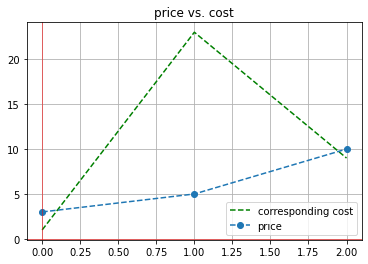

In [12]:
plt.plot(self.priceList, "g--")
plt.plot(self.costList, "o--")
plt.axhline(y=0, color='r', 
            linewidth=0.5, linestyle='-')
plt.axvline(x=0, color='r', 
            linewidth=0.5, linestyle='-')
plt.xlabel("Price"); plt.ylabel("Cost")
plt.legend(["Corresponding Cost","Price"])
plt.title("Price vs. Cost")
plt.grid()
plt.show()

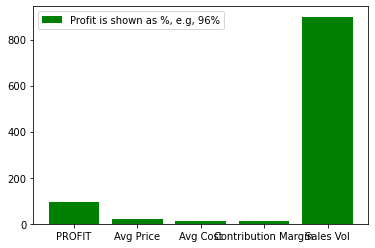

In [15]:
x_labels = ["PROFIT", "Avg Price", "Avg Cost", "Contribution Margin", "Sales Vol"]
plt.bar(x_labels, [96, 21.31, 10.53, 10.78, 899], color = "g")
plt.legend(["Profit is shown as %, e.g, 96%"])
plt.show()